# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации

In [1]:
import pandas as pd # импортируем библиотеку 

In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_columns', None) #отобразим все столбцы

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитаем csv файл

In [5]:
data.head(20) # посмотрим первые 20 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.info() # основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.describe() # посмотрим статистические описание датафрейма

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


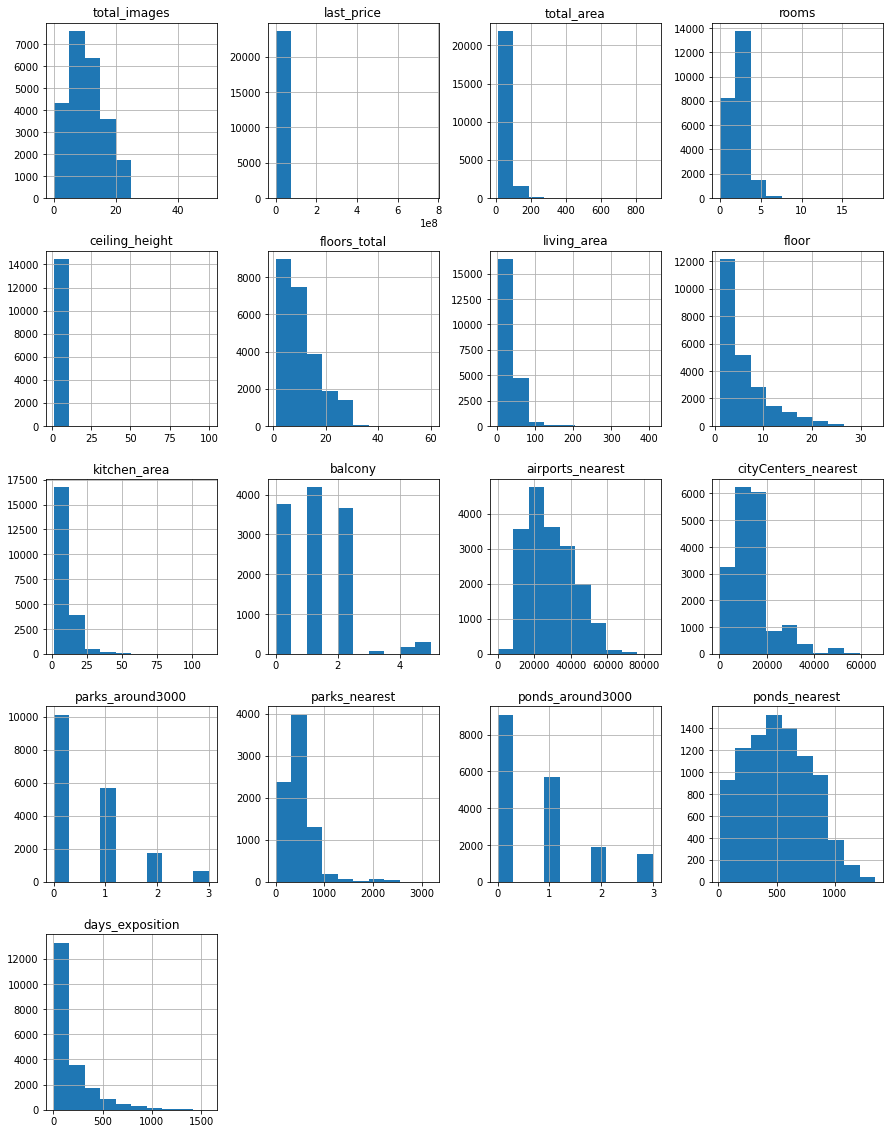

In [8]:
data.hist(figsize=(15,20))
plt.show() #построим общую гистограмму для всех числовых столбцов


По итогам знакомства с данными сделаны следующие **выводы**: 
- в представленных данные много пропусков; 
- есть нулевые значения в столбцах rooms, balcony, airports_nearest, parks_around3000, ponds_around3000; 
- некоректное название cityCenters_nearest, 
- некорректный формат столбца first_day_exposition и is_apartment.
Распределение на гистограмах на первый взгляд выглядит корректно, поэтому требуется детальный анализ показателей.


### Предобработка данных


##### Выведем количество пропущенных значений для каждого столбца

In [9]:
data.isna().sum() # выведем количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data.isna().sum()/data.shape[0]*100 #выведем количество пропущенных значений в процентах для каждого столбца

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [11]:
(data.isna().sum()/data.shape[0]*100).sort_values() #отсортируем значения

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Вывод: Пропущенных значений много. Где-то процент пропусков небольшой, как например в locality_name, а где-то очень большой, например в is_apartment. Нужно разбирать каждый столбец отдельно, т.к. пропуски могли быть по-разным причинам и значимость каждого столбца разная.

##### Проверим дубликаты


In [12]:
data.duplicated().value_counts() #проверим есть ли в исходных данных дубликаты

False    23699
dtype: int64

Вывод: Полностью совпадающих строк не обнаружено.

##### Предобработка в столбце last_price


In [13]:
data.sort_values(by='last_price', ascending=True).head(20) 
#отсортируем данные по стоимости объектов недвижимости по возрастанию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,False,False,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


In [14]:
data.drop(labels = [8793], axis=0, inplace=True) #удалим строку 8793, т.к. цена явно указана не корректно.

In [15]:
data.sort_values(by='last_price', ascending=False).head(20) 
#отсортируем данные по стоимости объектов недвижимости по убыванию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,False,False,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,False,False,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,False,False,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8.0,132.0,7,NaN,False,False,40.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


Вывод: Из данных удалена строка с last_price = 12190.0, т.к. цена явно указана не корректно, действительную цену установить не представляется возможным. Максимальное значение цены выглядит реалистично с учетом общей площади и населеного пункта. Остальные значения выглядят реалистично с учетом locality_name.

##### Предобработка в столбце first_day_exposition

В данных нет времени, поэтому приведем формат к более удобному.

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
#уберем из формата данные по времени

In [17]:
data.head(5) #проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


##### Предобработка в столбце rooms


In [18]:
data[data['rooms'] == 0] #посмотрим на строки, где  значения rooms равны 0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,False,True,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [19]:
data[(data['rooms'] == 0) & (data['studio']== False)] #посмотрим как много объектов недвижимости имеет 0 комнат и не является студией

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [20]:
data[(data['rooms'] == 0) & (data['studio']== True)] #посмотрим как много объектов недвижимости имеет 0 комнат и является студией

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,NaN,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,NaN,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Вывод: Значение 0 rooms имеют либо объекты недвижимости, являющиеся студиями, либо объекты недвижимости свободной планировки. Предполагаю, что объекты свободной планировки еще не имеют никаких стен, а студии по сути являются одной комнатой в принципе.


##### Предобработка в столбце ceiling_height


In [21]:
data[data['ceiling_height'].isna() == True].head(10) #посмотрим на строки, где пропущены значения ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23,1,NaN,6.0,17.00,1,NaN,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


In [22]:
data['ceiling_height'].unique() # на статических данных было видно, что максимальное значение 100, 
#посмотрим подробнее какие значения есть в этом столбце

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [23]:
data['ceiling_height'].value_counts().sort_values() #посмотрим на значения и как часто они встречаются


4.65       1
4.80       1
5.00       1
1.75       1
3.68       1
        ... 
2.80     993
3.00    1112
2.70    1574
2.60    1646
2.50    3515
Name: ceiling_height, Length: 183, dtype: int64

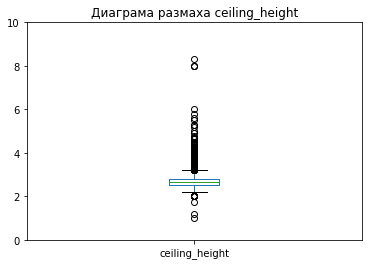

In [24]:
data['ceiling_height'].plot(kind='box', ylim=(0,10), title='Диаграма размаха ceiling_height')
#на диаграмме усов видно, что есть значения, которые очень сильно выбиваются
plt.show()

In [25]:
data['ceiling_height'].describe() #посмотрим описание столбца

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

 На диаграме расмаха видны аномальные значения.
 По данным описания видно, что аномальные значения не сильно влияют на среднее значение и медиану, но это происходит за счет того, что есть аномально низкие и аномально высокие показатели.

In [26]:
data['ceiling_height'] = data['ceiling_height'].replace({32:3.2, 27.5:2.75, 27:2.7, 26:2.6, 24:2.4, 25:2.5, 22.6:2.26}) 
#восстановим корректные значения в столбце высота потолков там, где это возможно

In [27]:
data.query('ceiling_height in [100, 14, 10.3, 8, 20, 1.75,1.2, 1, 2 ]') 
# посмотрим на срезе данные по объектам недвижимости, где значение ceiling_height является искаженными 
#не понятного происхождения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.5,6,NaN,False,False,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5.0,40.0,4,NaN,False,False,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.00,2018-03-16,1,8.00,5.0,15.3,2,False,False,False,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18.0,16.6,9,NaN,False,False,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.5,1,NaN,False,False,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,NaN,False,False,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.2,12,NaN,False,False,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
15061,19,5600000.0,56.40,2018-05-11,2,14.00,14.0,32.4,5,NaN,False,False,9.10,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.00,2016-11-11,3,8.00,16.0,41.0,1,NaN,False,False,8.00,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5.0,63.9,2,NaN,False,False,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN


In [28]:
data.drop(labels = [22869], axis=0, inplace=True) #удалим строку 22869, т.к. высота явно указана не корректно.

In [29]:
data['ceiling_height'].describe() # проверим изменение описания столбца после восстановления корректных значений

count    14502.000000
mean         2.730346
std          0.345260
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Вывод: Высота потолков относится к данным, которые заполняет сам пользователь. Предполагаю, что пропуски появились по причине того, что пользователь не добавил данную информацию в соответствующие поля. Пользователь мог и не знать данную информацию.
Считаю целесообразным оставить данные пропуски.

При анализе данных в столбце ceiling_height выявлены редкие и выбивающиеся значения, часть значений, где явно допущена ошибка при вводе изменена на корректные. Часть других значений, где есть искажение, проанализированы и выявлено, что их наличие не сильно искажает показатели медианного значения и среднего значения. Поэтому считаю, что данные значения не стоит удалять.
Аномальное значение ceiling_height в 100 м удалено, т.к. в данной строке имеется указание на жилую площадь, а значит данный объект не может быть отнесен к каким-то техническим помещениям.

##### Предобработка в столбце floors_total

In [30]:
data[data['floors_total'].isna() == True].head(10) #посмотрим на строки, где пропущены значения floors_total

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,False,False,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,False,False,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,False,False,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


In [31]:
data[(data['floors_total'].isna() == True) & (data['floor'].isna() == False)].shape[0]
#посмотрим сколько строк удовлетворяют условию - пропущенные значения в столбце floors_total 
#и не пропущенные значения в floor

86

In [32]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) 
#заменим пропущенные значения в столбце floors_total на floor

In [33]:
data[data['floors_total'].isna() == True].shape[0] #проверим все ли пропуски убрали в столбце floors_total

0

In [34]:
data['floors_total'] = data['floors_total'].astype('int')# заменим тип на int

In [35]:
data['floors_total'].dtypes #проверим замену

dtype('int64')

In [36]:
data.sort_values(by='floors_total', ascending=False) #посмотрим на данные по убыванию столбца floors_total

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.50,2018-06-28,2,2.88,60,27.4,4,NaN,False,False,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.00,2018-09-24,1,2.65,52,10.5,18,NaN,False,False,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
5807,17,8150000.0,80.00,2019-01-09,2,2.70,36,41.0,13,NaN,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
397,15,5990000.0,54.00,2018-03-22,2,NaN,36,21.4,28,NaN,False,False,18.70,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,4,1200000.0,39.40,2018-01-08,2,NaN,1,NaN,1,NaN,False,False,NaN,NaN,посёлок Гаврилово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16444,15,990000.0,88.00,2019-04-08,3,NaN,1,40.0,1,NaN,False,False,6.20,NaN,поселок Оредеж,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10817,6,790000.0,50.60,2017-11-29,3,NaN,1,32.0,1,NaN,False,False,NaN,NaN,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8388,20,3550000.0,48.20,2019-03-30,3,2.65,1,33.9,1,NaN,False,False,9.10,NaN,Сестрорецк,50046.0,31144.0,0.0,NaN,0.0,NaN,NaN


В данных есть аномальные значения, поиск в интернете дает результат, что в Кронштадте самое высокое здание 15 этажей, а в Санкт-Петербурге 87 этажей в общественно-деловом центре и 37 в жилых домах. Сходя из этого внесем изменения в данные.

In [37]:
data['floors_total'] = data['floors_total'].replace({60:6, 52:18}) 
#восстановим корректные значения в столбце floors_total там, где это возможно

Вывод: Предполагаю, что пользователь не указал сколько всего этажей в доме, т.к. общее количество этажей в доме совпадает с этажом на котором находится объект недвижимости. Поэтому пропуски в столбце floors_total были заменены на значения из столбца floor.
Т.к. этажи - это целое число, поменяем формат на int.
В двух строках произведена замена этажности в доме, т.к. 60 и 52 этажа - это явная аномалия.

##### Предобработка в столбце living_area
Предположительно пропуски появились по причине того, что пользователь не добавил данную информацию, т.к. объект не относится к жилому помещению.

In [38]:
data[data['living_area'].isna() == True].head(20) #посмотрим на строки, где пропущены значения living_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19,1,NaN,9,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,NaN,22,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,NaN,13,NaN,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01,1,NaN,12,NaN,8,NaN,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27,1,NaN,10,NaN,6,NaN,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15,3,NaN,25,NaN,16,NaN,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
116,18,10999000.0,97.2,2017-11-13,3,2.50,16,NaN,16,NaN,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0


In [39]:
data[(data['living_area'].isna() == True) & (data['is_apartment'].isna() == False)] 
#посмотрим сколько строк удовлетворяют условию - пропущенные значения в living_area 
#и не пропущенные значения в is_apartment

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
197,5,1600000.0,46.0,2016-04-22,2,NaN,5,NaN,2,False,False,False,NaN,1.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,171.0
322,6,2000000.0,25.0,2017-02-07,1,NaN,5,NaN,5,False,False,False,NaN,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
363,10,7100000.0,101.0,2019-04-08,4,2.60,8,NaN,7,False,False,False,16.5,2.0,Красное Село,26876.0,30300.0,0.0,NaN,0.0,NaN,NaN
546,0,6000001.0,25.0,2018-11-16,1,3.00,5,NaN,5,False,False,False,NaN,NaN,Санкт-Петербург,25169.0,3871.0,1.0,207.0,1.0,776.0,17.0
611,7,3650000.0,46.6,2018-08-06,2,2.50,5,NaN,3,False,False,False,6.0,2.0,Санкт-Петербург,40249.0,12753.0,0.0,NaN,0.0,NaN,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,9,4600000.0,73.0,2016-07-27,3,3.00,7,NaN,2,False,False,False,12.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,1005.0
23214,3,7990000.0,56.0,2016-05-31,2,NaN,6,NaN,5,False,False,False,NaN,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0
23238,8,5790000.0,36.3,2019-01-25,1,2.55,11,NaN,6,False,False,False,8.2,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,NaN
23413,18,6350000.0,73.0,2017-04-21,2,2.70,16,NaN,13,False,False,False,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,566.0


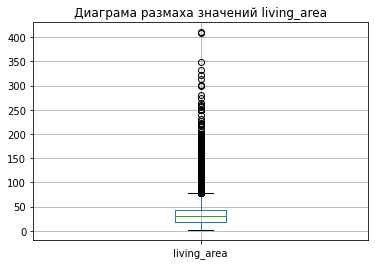

In [40]:
plt.show(data['living_area'].plot(kind='box', grid=True, title='Диаграма размаха значений living_area'))
#посмотрим распределение значений на диаграме размаха

In [41]:
data['living_area'].describe()

count    21794.000000
mean        34.458904
std         22.031014
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

На диаграме размаха видны значения сильно превышающие Q3+1.5* IQR, но не видны минимальные значения. Посмотрим на эти строки более подробно.

In [42]:
data.sort_values(by='living_area').head(20)
# выведем первые 20 строк, при общей площади 52 м2 жилая площадь 2 м2 
# или при общей площади 139 м2 жилая площадь 3 м2  - это точно ошибка.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,NaN,True,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,NaN,False,False,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22,6.5,21,NaN,False,False,18.0,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
23208,12,4800000.0,37.0,2016-02-24,1,NaN,14,8.0,11,NaN,False,False,22.0,0.0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0
20994,7,8900000.0,50.6,2018-10-22,2,2.50,7,8.0,3,NaN,False,False,31.0,NaN,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN


In [43]:
data.sort_values(by='living_area', ascending=False).head(20)
#посмотрим распределение по максимальным значениям, тут больше похоже на правду и по соотношениям жилая площадь- общая площадь 
# и со стоимостью жилья.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.5,7,NaN,False,False,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4,332.0,3,NaN,False,False,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,NaN,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.5,4,NaN,False,False,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
14088,8,51000000.0,402.0,2017-02-07,6,3.15,8,300.0,6,NaN,False,False,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0
20273,12,20000000.0,460.8,2019-03-20,6,3.10,3,279.6,1,NaN,False,False,55.5,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
22494,7,91075000.0,491.0,2017-05-27,5,4.20,9,274.0,9,NaN,False,False,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0


Вывод: Жилая площадь относится к данным, которые вносит сам пользователь. В столбце is_apartment есть строки, где указано, что недвижимость не относится к апартаментам. Соответственно утверждение, что пропуски в living_area появились по причине того, что пользователь не добавил данную информацию, т.к. объект не относится к жилому помещению не оправдало себя. 

Жилая площадь - это сумма площадей комнат. Площадь комнат нам не известна, а известна только общая площадь квартиры и площадь кухни, значит заполнить пропущенные значения в living_area медианным или средним значением будет не корректно, т.к. общая площадь зависит от данных, которые у нас отсутствуют - площадь балкона, саунузла, коридора и т.д.

Таким образом, предполагаю, что пропущенные поля в living_area появились потому что пользователь не внес данную информацию, он может и не знать данную информацию. Заполнить пропуски не представляется возможным. Пропуски оставляем.

В данных также присутствую явно не корректные минимальные значения living_area, но т.к. их не много и так же присутствуют естественные выбросы, которые позволяют не сильно исказить медианное значение, то значения оставим в таком виде.

##### Предобработка в столбце is_apartment


In [44]:
data[data['is_apartment'].isna() == True].head(10) #посмотрим на строки, где пропущены значения is_apartment

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [45]:
data[(data['is_apartment'].isna() == True) & (data['balcony'].isna()== False) & (data['balcony'] != 0)].head(10) 
#посмотрим объекты недвидимости, которые удовлетворяют условиям : пропущены значения в апартаментах и есть балкон.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
15,16,4650000.0,39.0,2017-11-18,1,NaN,14,20.5,5,NaN,False,False,7.6,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
17,6,4180000.0,36.0,2016-09-09,1,NaN,17,16.5,7,NaN,False,False,11.0,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,NaN,False,False,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
20,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,NaN,False,False,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
21,13,3200000.0,31.6,2018-03-14,1,NaN,5,16.9,2,NaN,False,False,5.7,1.0,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0


In [46]:
data[(data['is_apartment'] == True) & (data['balcony'].isna()== False) & (data['balcony'] != 0)].head(10) 
#посмотрим объекты недвидимости, которые удовлетворяют условиям : апартаментах и есть балкон.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
916,11,8183000.0,70.0,2018-01-11,2,3.12,3,40.0,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09,2,NaN,6,58.3,5,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
2759,11,7500000.0,152.0,2018-07-27,3,3.00,3,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3067,13,6600000.0,95.0,2018-09-08,2,4.50,7,45.0,7,True,False,False,25.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.1,2016-05-16,1,NaN,13,19.8,6,True,False,False,15.9,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20,1,3.00,11,17.0,9,True,False,False,12.0,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
5297,19,45000000.0,96.0,2018-11-15,2,3.20,6,NaN,4,True,False,False,45.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
5654,20,9200000.0,116.0,2019-04-26,3,3.20,5,68.0,5,True,False,False,32.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6523,11,7500000.0,82.0,2019-04-20,2,3.00,11,30.0,9,True,False,False,31.0,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
7056,8,3500000.0,56.4,2016-04-06,2,2.60,5,31.0,2,True,False,False,10.0,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,635.0


Однозначно говорить, что объекты недвижимости с балконом являются квартирами - нельзя, так как есть апартаменты с балконами.

In [47]:
data['is_apartment'].unique() #посмотрим какие значения есть в столбце is_apartment.

array([nan, False, True], dtype=object)

In [48]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заменим пропущенные значения на False

In [49]:
data[data['is_apartment'].isna() == True].shape[0] # проверим остались ли пропуски в столбце is_apartment

0

In [50]:
data['is_apartment'].dtypes #проверим тип в столбце

dtype('bool')

In [51]:
data['is_apartment'] = data['is_apartment'].replace({False:0, True:1}) # поменяем значения False на 0, True на 1

In [52]:
data['is_apartment'].value_counts()#посмотрим как распределились значения в столбце

0    23648
1       49
Name: is_apartment, dtype: int64

Вывод: Предполагаю, что пользователи не указали данную информацию потому что объект недвижимости не является апартаментами. Статус объекта недвижимости "апартаменты" очень отличается при покупке/продаже недвижимости, поэтому случайно пользователь не мог не указать этот пункт. На основании этого пропущенные значения заменены на False.
Для удобства дальнейших расчетов поменяем формат bool на int.

##### Предобработка в столбце kitchen_area

In [53]:
data[data['kitchen_area'].isna() == True].head(20) 
#посмотрим на строки, где пропущены значения kitchen_area



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19,1,NaN,9,NaN,2,0,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,NaN,1,0,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18,1,NaN,22,NaN,3,0,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06,1,NaN,13,NaN,13,0,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01,1,NaN,12,NaN,8,0,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27,1,NaN,10,NaN,6,0,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15,3,NaN,25,NaN,16,0,False,False,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23,1,NaN,25,NaN,6,0,False,False,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30,0,NaN,24,15.50,2,0,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [54]:
data[data['kitchen_area'] <= 5].sort_values(by='kitchen_area', ascending=True).head(25)
# на общих статистических данных видно, что есть кухни со значение 1.3 м2,посмотрим на строки, где самые маленькие кухни.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01,1,2.80,14,19.5,10,0,False,False,1.30,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
19642,5,1190000.0,14.00,2018-07-29,1,NaN,5,11.0,1,0,False,False,2.00,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
11033,6,5350000.0,32.00,2016-04-20,1,NaN,14,16.0,10,0,False,False,2.00,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
9138,17,2920000.0,23.29,2018-12-12,1,NaN,3,21.0,1,0,False,False,2.00,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
6262,9,3100000.0,24.00,2018-06-25,2,3.00,5,16.0,5,0,False,False,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
906,15,2600000.0,27.00,2017-07-10,1,2.75,23,18.0,18,0,False,False,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
16367,2,2720000.0,25.70,2017-10-30,1,NaN,19,22.6,11,0,False,False,2.00,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
21419,4,1870000.0,20.00,2018-03-06,1,2.50,5,14.0,1,0,False,False,2.00,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
17834,5,2940000.0,34.70,2017-10-09,1,NaN,26,15.5,14,0,False,False,2.30,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.0,3,0,False,False,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


Вывод: Площадь кухни относится к данным, которые пользователь вносит самостоятельно. На мой взгляд, в имеющихся данных нет закономерности с другими строками, поэтому считаю, что данные в столбце kitchen_area пропущенны потому что пользователь не знает точных данных по объекту недвижимости.

Пропуски оставляем.

Просмотр по самым минимальным значениям площади кухни показал, что у данных объектов недвижимости небольшая общая площадь. Поэтому предполагаю, что данные корректны.

##### Предобработка  в столбце balcony

Я предполагаю, что продавец не указал эти данные, т.к. в данных объектах недвижимости отсутствуют балконы.


In [55]:
data[data['balcony'].isna() == True].head(20) #посмотрим на строки, где пропущены значения balcony

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,0,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,0,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,0,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
16,11,6700000.0,82.00,2017-11-23,3,3.05,5,55.60,1,0,False,False,9.00,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
19,16,14200000.0,121.00,2019-01-09,3,2.75,16,76.00,8,0,False,False,12.00,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
23,11,2950000.0,32.00,2016-10-29,1,2.60,9,17.70,9,0,False,False,6.10,NaN,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
26,6,4050000.0,60.00,2017-04-28,4,NaN,5,43.00,4,0,False,False,7.00,NaN,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,0,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [56]:
data['balcony'] = data['balcony'].fillna(0) #заменим пропуски в столбце balcony на 0

In [57]:
data['balcony'].isna().sum() # проверим все ли пропуски удалили

0

Вывод: Предположительно пропуски в столбце balcony произошли из-за того, что пользователь не указал ничего в данном поле, потому что у объекта его недвижимости отсутствует балкон. Если бы балкон присутствовал, пользователь указал бы это как один из факторов повышения привлекательности объекта недвижимости для потенциального покупателя.  Поэтому пропущенные значения заменены на 0.

##### Предобработка в столбце locality_name

Я предполагаю, что в данные в этом столбце были пропущены по двум причинам:
- пользователь не указал адрес, в таком случае картографические значения (например airports_nearest) будут так же неопределены,
- техническая проблема при выгрузке или соединении данных, в таком случае картографические значения будут определены, но столбец locality_name будет с пропущенными значениями. 

In [58]:
data[(data['locality_name'].isna() == True) & (data['airports_nearest'].isna() == True)].shape[0] 
#посмотрим сколько строк удовлетворяют условию пропущенные значения в столбце locality_name и airports_nearest

8

In [59]:
data[(data['locality_name'].isna() == True) & (data['airports_nearest'].isna() == True)]
#посмотрим строки удовлетворяют условию пропущенные значения в столбце locality_name и airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30,3,NaN,4,42.6,2,0,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27,1,NaN,4,25.8,3,0,False,False,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30,3,NaN,9,NaN,2,0,False,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27,3,NaN,5,47.3,2,0,False,False,8.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06,2,2.7,4,29.0,3,0,False,False,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30,2,NaN,9,30.5,2,0,False,False,29.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30,2,NaN,9,36.6,2,0,False,False,29.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02,1,2.6,16,16.0,7,0,False,False,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


In [60]:
data[(data['locality_name'].isna() == True) & (data['airports_nearest'].isna() == False)].shape[0] 
#посмотрим сколько строк удовлетворяют условию пропущенные значения в столбце locality_name 
#и заполненные значения в столбце airports_nearest

41

In [61]:
data[(data['locality_name'].isna() == True) & (data['airports_nearest'].isna() == False)] 
#посмотрим строки удовлетворяющие условию пропущенные значения в столбце locality_name 
#и заполненные значения в столбце airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5,50.80,2,0,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2603,20,3351765.0,42.70,2015-09-20,1,NaN,24,15.60,3,0,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,NaN,24,33.10,21,0,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,NaN,5,30.80,5,0,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8,39.62,7,0,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4,52.30,3,0,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,NaN,7,NaN,6,0,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20,3,NaN,7,59.10,5,0,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29,1,NaN,24,20.00,23,0,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0
6765,20,4895892.0,60.70,2015-03-12,2,NaN,24,31.90,3,0,False,False,12.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0


In [62]:
data = data.dropna(subset=['locality_name']) #удалим пропущенные значения в столбце locality_name

In [63]:
data['locality_name'].isna().sum() #проверим наличие пропусков в столбце locality_name

0

In [64]:
data['locality_name'].nunique() #посмотрим количество уникальных значений в столбце с населенным пунктом

364

In [65]:
data['locality_name'].unique() #посмотрим уникальные значения в столбце с населенным пунктом

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из названий видно, что есть проблема с "е" и "ё".

In [66]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') # заменим "ё" на "е".

In [67]:
data['locality_name'].nunique() # посмотрим насколько изменилось количество.

330

In [68]:
data['locality_name'] = data['locality_name'].str.lower() #приведем все названия к нижнему регистру

In [69]:
data['locality_name'].nunique() #проверим изменилось ли количество.

330

In [70]:
sorted(data.locality_name.astype(str).unique()) #отсортируем

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок будогощь',
 'городской поселок виллози',
 'городской поселок лесогорский',
 'городской поселок мга',
 'городской поселок назия',
 'городской поселок новоселье',
 'городской поселок павлово',
 'городской поселок рощино',
 'городской поселок свирьстрой',
 'городской поселок советский',
 'городской поселок федоровское',
 'городской поселок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня

In [71]:
def replace_locality_name(wrong_values, correct_value): # на вход функции подаются список неправильных значений и строка с правильным значением
    try:
        for wrong_value in wrong_values: # перебираем неправильные имена
            data['locality_name'] = data['locality_name'].str.replace(wrong_value, correct_value) # и для каждого неправильного имени вызываем метод replace()
    except: 
        return
duplicates = ['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок ', 'поселок ', 'городского ','типа ' ,'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ', 'при ','железнодорожной ','станции ', 'пансионат '] # список неправильных имён
# список неправильных имён
name = '' # правильное имя
#создадим функцию, которая на основе данных locality_name,
#приведет все наименования к единому регистру.

In [72]:
replace_locality_name(duplicates, name) 

In [73]:
sorted(data.locality_name.astype(str).unique()) #проверим еще раз отсортированные значения

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'имен

In [74]:
data['locality_name'].nunique() # посмотрим насколько изменилось количество.

305

Вывод: Я считаю, часть пропусков в столбце locality_name произошла потому что пользователь не указал название населеного пункта, это подтвержается тем, что картографические данные отсутствуют полностью. А часть пропусков - произошла вероятнее всего по какой-то технической проблеме, т.к. если бы пользователь не указал название населеного пункта, мы бы не увидели картографические данные даже частично.

Т.к. название населеного пункта важно при определении стоимости жилья, а масштаб пропущенных значений locality_name составляет 0.206760 % (49 строк), то данные строки целесообразнее удалить.

Из столбца удалены частично неявные дубликаты. Остальные значения приведены к единому регистру, исходя из того что объекты недвижимости расположены в определенной локации  в Санкт-Петербурге и соседних населённых пунктах.

##### Предобработка в столбце airports_nearest

In [75]:
data[data['airports_nearest'].isna() == True].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,0,False,False,9.10,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,0,False,False,8.81,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,0,False,False,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,0,False,False,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,0,False,False,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,0,False,False,NaN,0.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,0,False,False,11.60,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,0,False,False,5.70,1.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,0,False,False,NaN,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,0,False,False,11.90,2.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [76]:
data.sort_values(by='airports_nearest', ascending=True) #посмотрим на строки с минимальным значением столбца airports_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,0,False,False,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0
12899,8,4199000.0,56.0,2017-12-21,2,NaN,9,27.0,5,0,False,False,15.0,0.0,санкт-петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0
4017,7,2268000.0,35.0,2017-12-21,1,NaN,9,14.0,6,0,False,False,8.0,0.0,санкт-петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0
7778,9,2750000.0,29.0,2017-02-19,1,2.5,4,15.0,1,0,False,False,6.0,0.0,санкт-петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0
23150,3,6490000.0,62.5,2015-03-18,2,NaN,24,33.5,15,0,False,False,9.0,4.0,санкт-петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.8,2018-09-18,4,2.5,5,45.5,3,0,False,False,5.5,0.0,дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.0,2017-07-07,1,NaN,5,17.5,4,0,False,False,6.0,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15,3,NaN,5,38.0,4,0,False,False,8.5,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,NaN,3,29.7,1,0,False,False,NaN,0.0,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.drop(labels = [21085], axis=0, inplace=True) #удалим строку 21085, т.к. расстояние до аэропорта аномальное, явно указана не корректно.

Вывод: Как мы видим по столбцу airports_nearest очень много пропусков. Т.к. эти данные относятся к картографическим, предполгаю, что данные отсутствуют по технической проблеме. При заполнении адреса пользователь мог ввести данные не корректно, в таком случае картографические данные не расчитались. Пропуски оставляем.
Строку с аномальным расстоянием (0) удаляем.

##### Преобработка в столбце cityCenters_nearest

In [78]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}) # переименуем столбец в соответствии со змеиным регистром

In [79]:
data.columns # проверим переименование

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [80]:
data[data['city_centers_nearest'].isna() == True].head(20) # посмотрим пропуски в столбце city_centers_nearest

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,0,False,False,9.10,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,0,False,False,8.81,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,0,False,False,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,0,False,False,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,0,False,False,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,0,False,False,NaN,0.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,0,False,False,11.60,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,0,False,False,5.70,1.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,0,False,False,NaN,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,0,False,False,11.90,2.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Вывод: Как мы видим по столбцу city_centers_nearest очень много пропусков. Т.к. эти данные относятся к картографическим, предполгаю, что данные отсутствуют по технической проблеме. При заполнении адреса пользователь мог ввести данные не корректно, в таком случае картографические данные не расчитались. Пропуски оставляем.

##### Преобработка в столбце parks_around3000, parks_nearest, ponds_nearest

In [81]:
data[data['parks_around3000'].isna() == True].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,0,False,False,9.10,0.0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,0,False,False,8.81,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5,30.00,5,0,False,False,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,0,False,False,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9,NaN,2,0,False,False,NaN,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28,2,2.50,5,NaN,1,0,False,False,NaN,0.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29,1,2.75,18,16.30,9,0,False,False,11.60,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18,3,NaN,4,42.50,3,0,False,False,5.70,1.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01,1,NaN,12,NaN,8,0,False,False,NaN,0.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17,3,2.80,9,48.80,5,0,False,False,11.90,2.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Вывод: В столбце parks_around3000, parks_nearest, ponds_nearest много пропусков, которые так же как и в столбце city_centers_nearest являются картографическими. На мой взгляд, причина пропусков тут техническая. Указанный адрес не подтянул картографические данные.
Пропуски оставляем.

##### Преобработка в столбце days_exposition

In [82]:
data[data['days_exposition'].isna() == True].head(10) #посмотрим на данные где пропущены значения по столбцу days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,0,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,0,False,False,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,NaN,22,NaN,3,0,False,False,NaN,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02,2,2.65,9,30.30,7,0,False,False,7.0,0.0,санкт-петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31,2,2.60,24,29.70,9,0,False,False,8.3,2.0,санкт-петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22,1,2.50,9,18.00,7,0,False,False,6.0,0.0,санкт-петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.00,2,0,False,False,11.0,1.0,санкт-петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27,3,2.50,9,39.00,8,0,False,False,6.2,0.0,санкт-петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27,1,NaN,10,NaN,6,0,False,False,NaN,0.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13,2,NaN,2,27.46,1,0,False,False,5.2,0.0,кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data['days_exposition'].isna().sum() #посмотрим количество пропусков

3180

Вывод: Пропуски в столбце days_exposition, на мой взгляд, появились вследствии технической проблемы, при выгрузке. Показатель days_exposition расчитывается как разница между датой снятия объявления и датой размещения объявления, поэтому значения могут пропущены при отсутствии даты снятия или если она некорректна.
Пропуски оставляем.

Проведя **предобработку данных**, можно сделать следующие **выводы**:
Детальный разбор показателей показал, что в данных есть дубликаты, аномалии, пропуски, некорректные значения, поэтому было произведено следующее:
-  Из данных last_price удалены некорректные строки, максимальные значение цены выглядят реалистично с учетом общей площади и населеного пункта. Остальные значения выглядят реалистично с учетом locality_name.

-  Значение 0 rooms имеют либо объекты недвижимости, являющиеся студиями, либо объекты недвижимости свободной планировки, что допускается при отсутствии стен. 

-  Высота потолков относится к данным, которые заполняет сам пользователь. Предполагаю, что пропуски появились по причине того, что пользователь не добавил данную информацию в соответствующие поля. Пользователь мог и не знать данную информацию. Пропуски оставляем.

-  В столбце ceiling_height выявлены редкие и выбивающиеся значения, часть значений, где явно допущена ошибка при вводе изменена на корректные. Часть других значений, где есть искажение, проанализированы и выявлено, что их наличие не сильно искажает показатели медианного значения и среднего значения. Поэтому считаю, что данные значения не стоит удалять. Аномальное значение ceiling_height в 100 м удалено, т.к. в данной строке имеется указание на жилую площадь, а значит данный объект не может быть отнесен к каким-то техническим помещениям.

-  Предполагаю, что пропуски в столбце floors_total появились потому что пользователь не указал сколько всего этажей в доме, т.к. общее количество этажей в доме совпадает с этажом на котором находится объект недвижимости. Поэтому пропуски в столбце floors_total были заменены на значения из столбца floor. А так же заменен формат на int. Выявлены аномалии 60 и 52 этажа, значения по ним заменены.

-  Предполагаю, что пропущенные поля в living_area появились потому что пользователь не внес данную информацию, он может и не знать данную информацию. Заполнить пропуски не представляется возможным. Пропуски оставляем. В данных также присутствую явно не корректные минимальные значения living_area, но т.к. их не много и так же присутствуют естественные выбросы, которые позволяют не сильно исказить медианное значение, то значения оставим в таком виде.

-  Предполагаю, что пропуски в столбце is apartament появились, потому что пользователи не указали информацию потому что объект недвижимости не является апартаментами. Статус объекта недвижимости "апартаменты" очень отличается при покупке/продаже недвижимости, поэтому случайно пользователь не мог не указать этот пункт. На основании этого пропущенные значения заменены на False.Для удобства дальнейших расчетов поменяем формат bool на int.

-  Предполагаю, что часть пропусков в столбце locality_name произошла потому что пользователь не указал название населеного пункта, это подтвержается тем, что картографические данные отсутствуют полностью. А часть пропусков - произошла вероятнее всего по какой-то технической проблеме, т.к. если бы пользователь не указал название населеного пункта, мы бы не увидели картографические данные даже частично. Т.к. название населеного пункта важно при определении стоимости жилья, а масштаб пропущенных значений locality_name составляет 0.206760 % (49 строк), то данные строки целесообразнее удалить. Из столбца удалены частично неявные дубликаты. Остальные значения приведены к единому регистру, исходя из того что объекты недвижимости расположены в определенной локации  в Санкт-Петербурге и соседних населённых пунктах.

-  В столбце airports_nearest очень много пропусков. Т.к. эти данные относятся к картографическим, предполгаю, что данные отсутствуют по технической проблеме. При заполнении адреса пользователь мог ввести данные не корректно, в таком случае картографические данные не расчитались. Пропуски оставляем. Строки с аномальным расстоянием (0) удаляем.

-  Как мы видим по столбцу city_centers_nearest очень много пропусков. Т.к. эти данные относятся к картографическим, предполгаю, что данные отсутствуют по технической проблеме. При заполнении адреса пользователь мог ввести данные не корректно, в таком случае картографические данные не расчитались. Пропуски оставляем.

-  В столбце parks_around3000, parks_nearest, ponds_nearest много пропусков, которые так же как и в столбце city_centers_nearest являются картографическими. На мой взгляд, причина пропусков тут техническая. Указанный адрес не подтянул картографические данные. Пропуски оставляем.

-  Предполагаю, что пропуски в столбце days_exposition, появились вследствии технической проблемы, при выгрузке. Показатель days_exposition расчитывается как разница между датой снятия объявления и датой размещения объявления, поэтому значения могут пропущены при отсутствии даты снятия или если она некорректна. Пропуски оставляем.

### Посчитаем и добавим в таблицу новые столбцы

##### Цена одного квадратного метра

In [84]:
data['price_per_meter'] = data['last_price']/data['total_area'] 
#определим цену одного квадратного метра в каждом объекте недвижимости

In [85]:
data['price_per_meter'] = data['price_per_meter'].round(decimals=2) #произведем округление до 2-х знаков.

##### День недели публикации

In [86]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

##### Месяц публикации

In [87]:
data['month_exposition']  = data['first_day_exposition'].dt.month

##### Год публикации

In [88]:
data['year_exposition']  = data['first_day_exposition'].dt.year

##### Тип этажа квартиры

In [89]:
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'ошибка'
    #создадим функцию, которая на основе данных floors_total и floor, которая выведет какой этаж.

In [90]:
data['floor_type'] = data.apply(floor_type, axis=1) #применим метод ко всем строкам


##### Расстояние до центра города (км)

In [91]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000 #переводим из метров в километры

In [92]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round() #округляем значения

### Исследовательский анализ данных

#### Изучим параметры объектов:

##### Общая площадь <a id='total_area'></a>

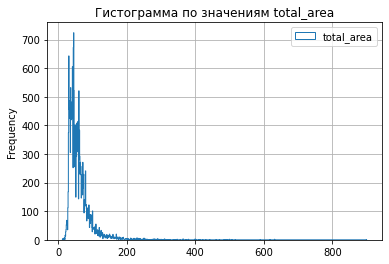

In [93]:
data.plot(
    kind='hist',
    bins=1000,
    y='total_area',
    grid=True,
    histtype='step',
    title='Гистограмма по значениям total_area'
) #построим гистограмму
plt.show()

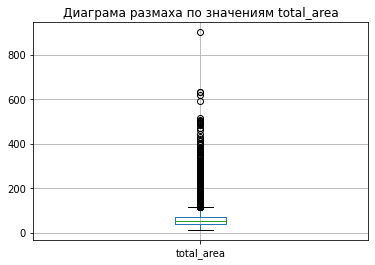

In [94]:
data.plot(
    kind='box',
    y='total_area',
    grid=True,
    title='Диаграма размаха по значениям total_area'
) 
#построим диаграму размаха
plt.show()

In [95]:
data['total_area'].describe()
#посмотрим статистические данные

count    23647.000000
mean        60.329589
std         35.661536
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

По гистограмме,диаграме размаха и статистическим данным столбца total_area можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с общей площадью примерно от 40м2 до 70 м2. На данных есть выбросы по максимальным значениям общей площади, таких значений не много, поэтому на данные они влияют не сильно.



##### Жилая площадь <a id='living_area'></a>

In [96]:
data['living_area'].describe()
#посмотрим статистические данные

count    21749.000000
mean        34.450082
std         22.038518
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

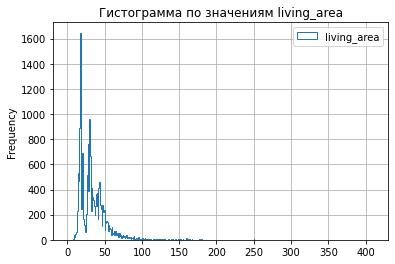

In [97]:
data.plot(
    kind='hist',
    bins=500,
    y='living_area',
    grid=True,
    histtype='step',
    title='Гистограмма по значениям living_area'
) #построим гистограмму
plt.show()

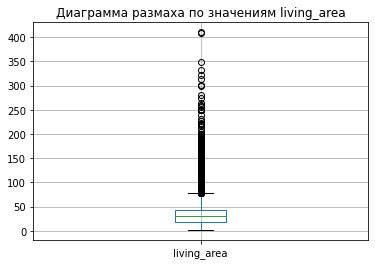

In [98]:
data.plot(
    kind='box',
    y='living_area',
    grid=True,
    title='Диаграмма размаха по значениям living_area'
) 
#построим диаграму размаха
plt.show()

По гистограмме, диаграме размаха и статистическим данным столбца living_area можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с жилой площадью примерно от 18м2 до 42 м2. Объектов недвижимости с площадью более 75м2 уже намного меньше. На данных есть выбросы по максимальным значениям жилой площади, появление которых ожидаемо, при наличии объектов недвижимости с большой общей площадью, таких значений не много, поэтому на данные они влияют не сильно.


#####  Площадь кухни <a id='kitchen_area'></a>

In [99]:
data['kitchen_area'].describe()
#посмотрим статистические данные

count    21378.000000
mean        10.565196
std          5.898531
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

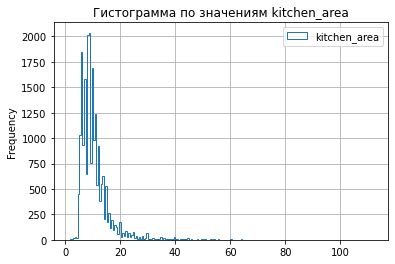

In [100]:
data.plot(
    kind='hist',
    bins=200,
    y='kitchen_area',
    grid=True,
    histtype='step',
    title='Гистограмма по значениям kitchen_area'
) #построим гистограмму
plt.show()

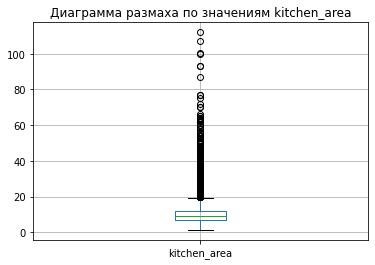

In [101]:
data.plot(
    kind='box',
    y='kitchen_area',
    grid=True,
    title='Диаграмма размаха по значениям kitchen_area'
) 
#построим диаграму размаха
plt.show()

По гистограмме, диаграме размаха и статистическим данным столбца kitchen_area можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с площадью кухни примерно от 7 м2 до 12 м2. Объектов недвижимости с площадью кухни более 20 м2 уже намного меньше. На данных есть выбросы по максимальным значениям площади кухни и по минимальным, появление которых ожидаемо, при наличии объектов недвижимости с большой общей площадью и малой общей площадью, таких значений не много, поэтому на данные они влияют не сильно.

#####  Цена объекта <a id='last_price'></a>

In [102]:
price_million = data['last_price']/1000000 
#изменим масштаб отображения значений ценны, пересчитаем цену в миллионах.

In [103]:
price_million.describe()
#посмотрим статистические данные

count    23647.000000
mean         6.541026
std         10.896868
min          0.430000
25%          3.400000
50%          4.650000
75%          6.794500
max        763.000000
Name: last_price, dtype: float64

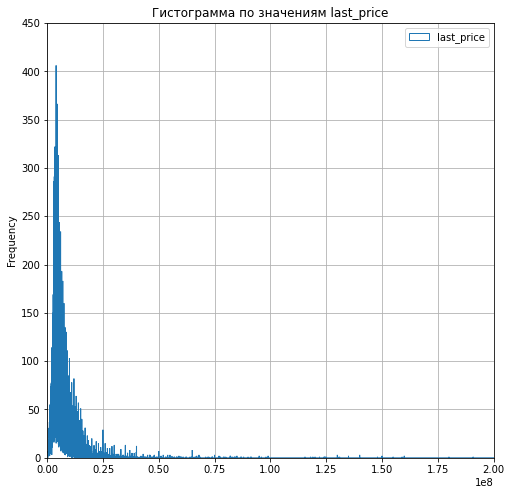

In [104]:
data.plot(
    kind='hist',
    bins=23649,
    y='last_price',
    grid=True,
    histtype='step',
    ylim=(0,450),
    xlim=(-100,200000000),
    figsize = (8,8),
    title = 'Гистограмма по значениям last_price'

) #построим гистограмму
plt.show()

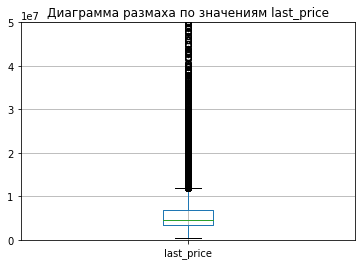

In [105]:
data.plot(
    kind='box',
    y='last_price',
    grid=True,
    ylim=(0,50000000),
    title = 'Диаграмма размаха по значениям last_price'
) 
#построим диаграму размаха
plt.show()

По гистограмме, диаграме размаха и статистическим данным столбца last_price можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с ценой продажи примерно от 3,4 млн  до 7 млн. Объектов недвижимости с ценой более 25 млн уже намного меньше. На данных есть выбросы по максимальным значениям стоимости объектав и по минимальным, появление которых ожидаемо, при наличии объектов недвижимости с большой общей площадью и малой общей площадью, таких значений не много, поэтому на данные они влияют допустимо.

#####  Количество комнат <a id='rooms'></a>

In [106]:
data['rooms'].describe()
#посмотрим статистические данные

count    23647.000000
mean         2.070199
std          1.078644
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

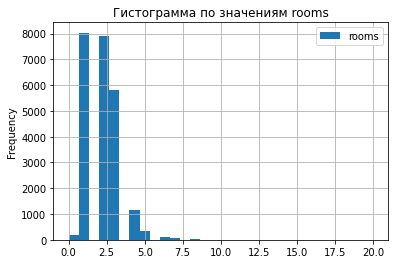

In [107]:
data.plot(
    kind='hist',
    bins=30,
    y='rooms',
    range=(0, 20),
    grid=True,
    title = 'Гистограмма по значениям rooms'
) #построим гистограмму
plt.show()

In [108]:
data.value_counts('rooms') #посмотрим сколько каких комнат подробнее

rooms
1     8034
2     7923
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
12       1
15       1
16       1
19       1
dtype: int64

In [109]:
data.sort_values(by='rooms', ascending=False).head(20)
# посмотрим на объекты недвидимости с самым большим количеством комнат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,0,False,False,27.6,0.0,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,86091.83,5,6,2018,другой,4.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,0,False,False,13.0,1.0,санкт-петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,105555.56,0,3,2015,последний,4.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,0,False,False,100.0,0.0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,5.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4,168.3,2,0,False,False,25.9,0.0,санкт-петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,116784.84,3,3,2016,другой,2.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,0,False,False,16.6,0.0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,68870.52,5,12,2017,другой,8.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,0,False,False,112.0,0.0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,0,False,False,13.3,0.0,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,95264.02,6,7,2018,последний,3.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,0,False,False,11.9,0.0,санкт-петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,170015.46,1,2,2017,другой,1.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5,161.4,2,0,False,False,19.8,0.0,санкт-петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0,71726.05,0,7,2016,другой,5.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,0,False,False,30.0,1.0,санкт-петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0,137931.03,1,6,2016,последний,5.0


По гистограмме и статистическим данным столбца rooms можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с 1-ой,2-мя и 3-мя комнатами. Объектов недвижимости с количеством комнат от 6-ти уже значительно меньше. Объекты недвижимости с 11-19 комнатами являются аномальными значениями, наличие которых возможно при большом размере общей площади и соответсвующей стоимости.

#####  Высота потолков <a id='ceiling_height'></a>

In [110]:
data['ceiling_height'].describe()
#посмотрим статистические данные

count    14487.000000
mean         2.730097
std          0.345149
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

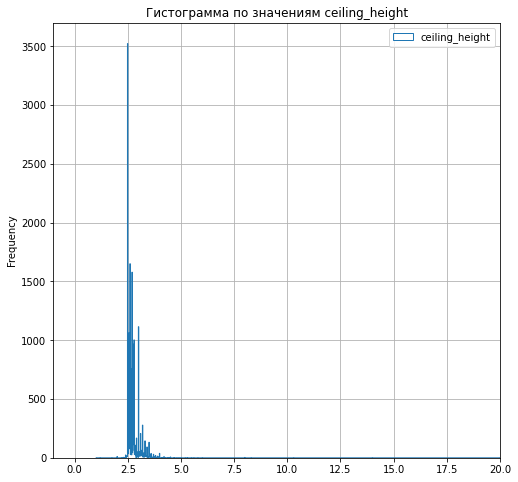

In [111]:
data.plot(
    kind='hist',
    bins=1000,
    y='ceiling_height',
    grid=True,
    histtype='step',
    xlim=(-1,20),
    figsize = (8,8),
    title = 'Гистограмма по значениям ceiling_height'

) #построим гистограмму
plt.show()

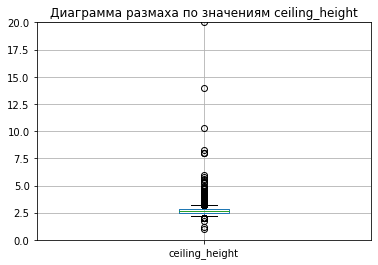

In [112]:
data.plot(
    kind='box',
    y='ceiling_height',
    grid=True,
    ylim=(0,20),
    title = 'Диаграмма размаха по значениям ceiling_height'
) 
#построим диаграму размаха
plt.show()

По гистограмме,диаграме размаха и статистическим данным столбца ceiling_height можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с высотой потолков примерно 2.5 м- 2.8 м. Объектов недвижимости с высотой полотков от 3.5 уже значительно меньше. Объекты недвижимости с высотой потолков от 6 м являются аномальными значениями, наличие которых не сильно искажает средние и медианные значения.

#####  Этаж квартиры <a id='floor'></a>

In [113]:
data['floor'].describe()
#посмотрим статистические данные

count    23647.000000
mean         5.892629
std          4.882006
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

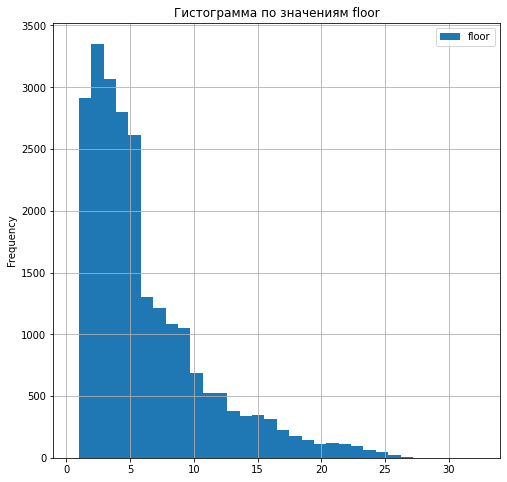

In [114]:
data.plot(
    kind='hist',
    bins=33,
    y='floor',
    grid=True,
    xlim=(-1,34),
    figsize = (8,8),
    title = 'Гистограмма по значениям floor'

) #построим гистограмму
plt.show()

In [115]:
data.value_counts('floor') #посмотрим сколько каких этажей подробнее

floor
2     3353
3     3064
1     2912
4     2802
5     2615
6     1302
7     1215
8     1083
9     1050
10     687
12     525
11     523
13     379
15     343
14     335
16     315
17     227
18     178
19     147
21     123
22     112
20     110
23      99
24      63
25      45
26      24
27      10
28       1
29       1
30       1
31       1
32       1
33       1
dtype: int64

По гистограмме и статистическим данным столбца floor можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости на 2,3,1,4,5,6,7 этаже. Объектов недвижимости на этаже от 10 уже значительно меньше. Объекты недвижимости с этажом от 25 являются редкими.

#####  Тип этажа квартиры <a id='floor_type'></a>

In [116]:
data['floor_type'].value_counts()
#посмотрим статистические данные

другой       17324
последний     3411
первый        2912
Name: floor_type, dtype: int64

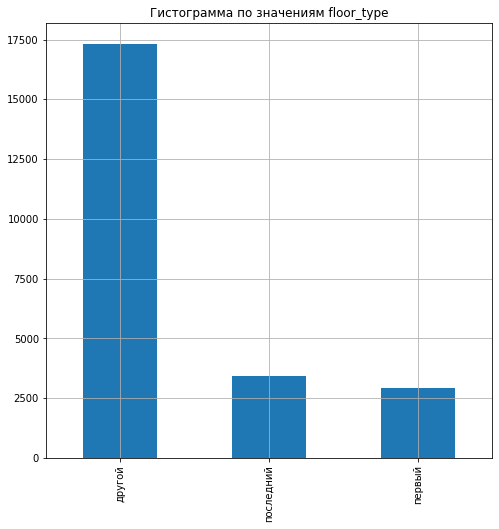

In [117]:
data['floor_type'].value_counts().plot(
    kind='bar',
    grid=True,
    figsize = (8,8),
    title = 'Гистограмма по значениям floor_type'

) #построим столбчатый график
plt.show()

По графику и статистическим данным столбца floor_type можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости с типом "другой". Объектов недвижимости на "последнем" этаже и на "первом" примерно одинаково. Распределение данных ожидаемо, т.к. под категорию "другой" попадают все объекты недвижимости со 2-го этажа по "последний"-1. 

#####  Общее количество этажей в доме<a id='floors_total'></a>

In [118]:
data['floors_total'].describe()
#посмотрим статистические данные

count    23647.000000
mean        10.669768
std          6.580050
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

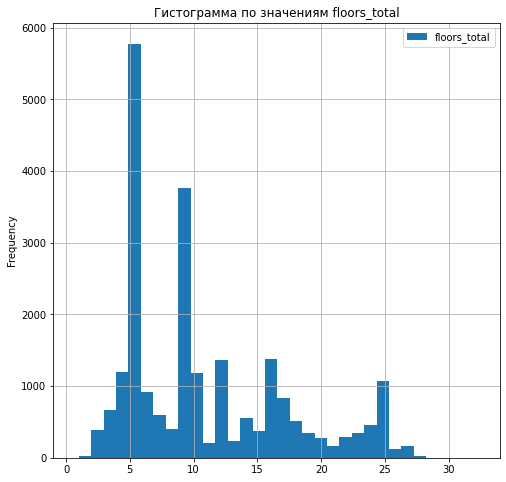

In [119]:
data.plot(
    kind='hist',
    bins=37,
    y='floors_total',
    grid=True,
    xlim=(-1,34),
    figsize = (8,8),
    title = 'Гистограмма по значениям floors_total'

) #построим гистограмму
plt.show()

In [120]:
data['floors_total'].value_counts() #посмотрим распределение этажности недвижимости и количества таких домов.

5     5778
9     3762
16    1375
12    1367
4     1202
10    1177
25    1074
6      920
17     834
3      671
7      593
14     555
18     509
24     464
8      396
2      383
15     368
23     350
19     342
22     287
20     273
13     232
11     205
27     164
21     162
26     124
1       28
35      24
28      21
36       3
37       1
34       1
29       1
33       1
Name: floors_total, dtype: int64

По графику и статистическим данным столбца floors_total можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости  высотой 5 и 9 этажей. Меньше -  16 этажей и 12 этажей, их примерно одинаковое количество. Объекты недвижимости выше 26 этажей уже редки. А также редкие оказались объекты недвижимости с 1 этажом.

#####  Расстояние до центра города в метрах <a id='city_centers_nearest'></a>

In [121]:
data['city_centers_nearest'].describe()
#посмотрим статистические данные

count    18136.000000
mean     14197.989413
std       8607.112232
min        181.000000
25%       9241.000000
50%      13106.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

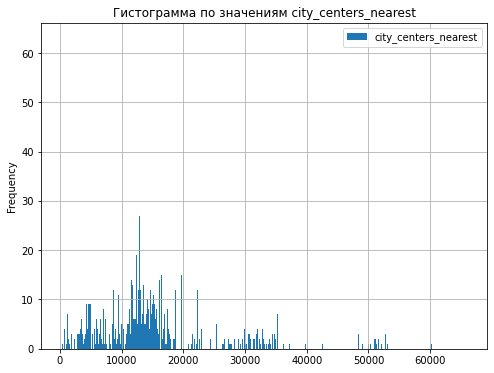

In [122]:
data.plot(
    kind='hist',
    bins= 10000,
    y='city_centers_nearest',
    grid=True,
    figsize = (8,6),
    title = 'Гистограмма по значениям city_centers_nearest'

) #построим гистограмму
plt.show()

По гистограмме и статистическим данным столбца city_centers_nearest можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости удаленностью от центра примерно от 11000 до 18000 м. Меньше объектов недвижимости расположенных до 10000 м до центра города. Объектов недвижимости с удаленностью выше 20000 уже совсем немного.

#####  Расстояние до ближайшего аэропорта <a id='airports_nearest'></a>

In [123]:
data['airports_nearest'].describe()
#посмотрим статистические данные

count    18113.00000
mean     28804.05543
std      12636.33872
min       6450.00000
25%      18576.00000
50%      26756.00000
75%      37294.00000
max      84869.00000
Name: airports_nearest, dtype: float64

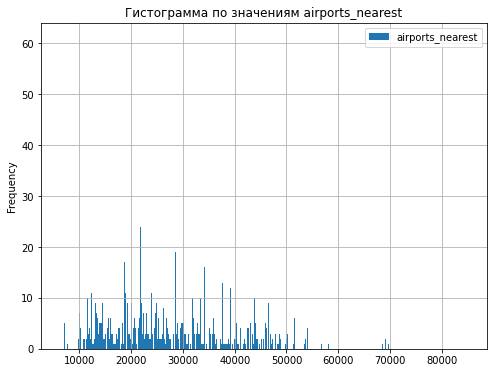

In [124]:
data.plot(
    kind='hist',
    bins= 10000,
    y='airports_nearest',
    grid=True,
    figsize = (8,6),
    title = 'Гистограмма по значениям airports_nearest'

) #построим гистограмму
plt.show()

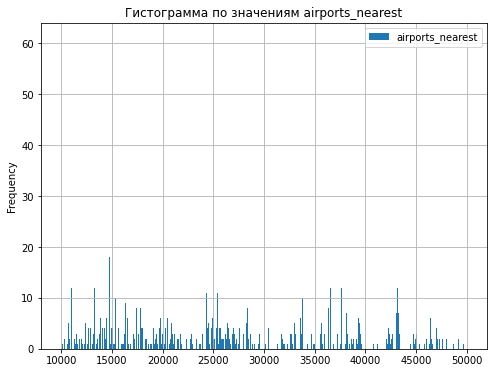

In [125]:
data.plot(
    kind='hist',
    bins= 10000,
    y='airports_nearest',
    grid=True,
    range=(10000,50000),
    figsize = (8,6),
    title = 'Гистограмма по значениям airports_nearest'

) #построим гистограмму
plt.show()

По гистограмме и статистическим данным столбца airports_nearest можно сделать следующий **вывод**: Самое большое распространение имеют объекты недвижимости удаленностью от аэропорта примерно от 12000 м до 27000 м. Объектов недвижимости с удаленностью меньше 10000 м и больше 55000 м единицы.

#####  Расстояние до ближайшего парка <a id='parks_nearest'></a>

In [126]:
data['parks_nearest'].describe()
#посмотрим статистические данные

count    8062.000000
mean      490.824981
std       342.566020
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

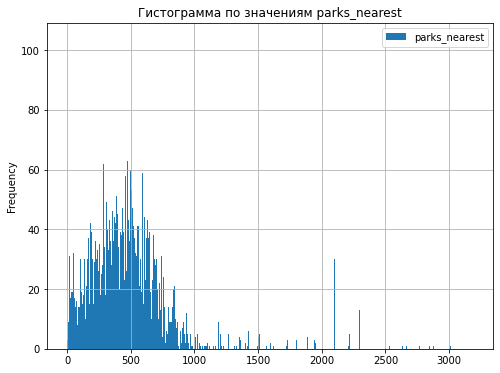

In [127]:
data.plot(
    kind='hist',
    bins= 1000,
    y='parks_nearest',
    grid=True,
    figsize = (8,6),
    title = 'Гистограмма по значениям parks_nearest'

) #построим гистограмму
plt.show()

По гистограмме и статистическим данным столбца parks_nearest можно сделать следующий **вывод**: В целом объекты недвижимости расположены недалеко от парков. Больше всего объектов недвижимости с удаленностью примерно 250 м до 600 м. Объекты удаленностью более 1000 м уже редки.

#####  День и месяц публикации объявления <a id='weekday_exposition'></a>

In [128]:
data['weekday_exposition'].describe()
#посмотрим статистические данные по дням

count    23647.000000
mean         2.568613
std          1.788774
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

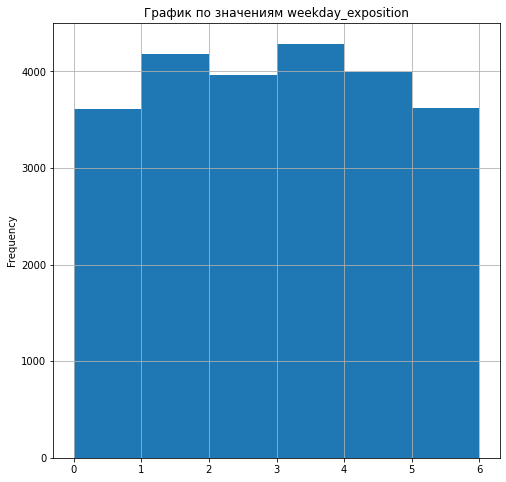

In [129]:
data['weekday_exposition'].plot(
    kind='hist',
    bins=6,
    grid=True,
    figsize = (8,8),
    title = 'График по значениям weekday_exposition'

) #построим столбчатый график по дням
plt.show()

In [130]:
data['month_exposition'].describe()
# посмотрим статистические данные по месяцам

count    23647.000000
mean         6.401573
std          3.491527
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

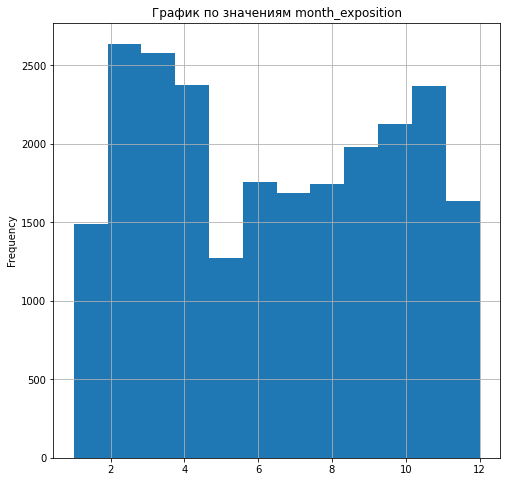

In [131]:
data['month_exposition'].plot(
    kind='hist',
    bins=12,
    grid=True,
    figsize = (8,8),
    title = 'График по значениям month_exposition'

) #построим столбчатый график по месяцам
plt.show()

По диаграмме и статистическим данным столбца weekday_exposition и month_exposition можно сделать следующий **вывод**: На диаграмме weekday_exposition видно, что больше всего публикуют объеявления в 3 (четверг) и 1 (вторник), а меньше всего в 5 (суббота) и 6 (воскресенье),т.е.в выходные дни. 

На диаграмме month_exposition видно, что наибольшее количество публикаций объявлений было во 2(февраль) и 3(март), а меньше всего объявлений в 5(май) и 1 (январь), в летние месяцы 6(июнь),7(июль),8(август) количество публикуемых объявлений примерно одинаково. 

Таким образом можно сделать вывод, что пользователи меньше всего публикуют объявления в выходные дни и в месяца, когда больше всего выходных.

####  Изучим как быстро продавались объекты <a id='sale'></a>

У нас имеются данные с количеством дней, которые объвление было размещено, однако нет точной информации по какой причине объявление могло быть снято: по желанию пользователя(передумал продавать), произошла продажа, объявление удалено технически.

In [132]:
data['days_exposition'].describe()
# посмотрим статистические данные по количеству дней, которые было размещено объявление

count    20467.000000
mean       180.775443
std        219.786176
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

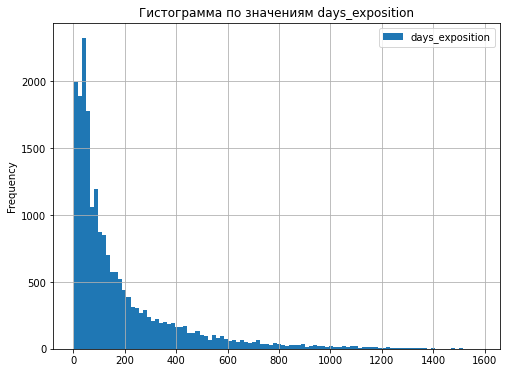

In [133]:
data.plot(
    kind='hist',
    bins= 100,
    y='days_exposition',
    grid=True,
    figsize = (8,6),
    title = 'Гистограмма по значениям days_exposition'

) #построим гистограмму
plt.show()

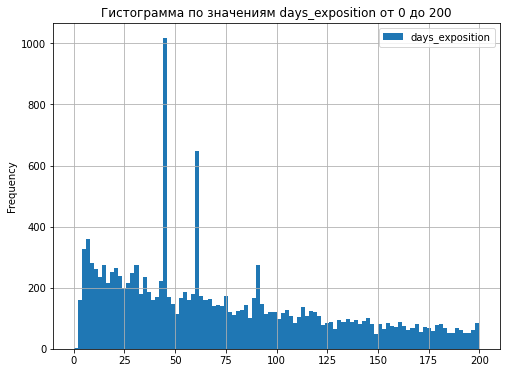

In [134]:
data.plot(
    kind='hist',
    bins= 100,
    y='days_exposition',
    grid=True,
    range=(0,200),
    figsize = (8,6),
    title = 'Гистограмма по значениям days_exposition от 0 до 200'

) 
plt.show()
#построим гистограмму на участке от 0 до 200, чтобы посмотреть где пики

На участке от 0 до 200 есть три выделяющихся пика. Посмотрим на распределение в числом выражении.

In [135]:
data['days_exposition'].value_counts().sort_values(ascending=False).head(40) #построим гистограмму на участке от 0 до 200, чтобы посмотреть где пики

45.0    879
60.0    537
7.0     234
30.0    208
90.0    203
4.0     174
3.0     158
5.0     152
14.0    148
9.0     142
20.0    139
44.0    138
8.0     138
11.0    135
18.0    129
13.0    128
10.0    127
22.0    125
15.0    125
28.0    125
6.0     124
21.0    124
29.0    122
19.0    121
35.0    120
24.0    116
17.0    116
42.0    115
34.0    114
23.0    112
27.0    110
54.0    110
61.0    109
12.0    108
43.0    107
74.0    106
59.0    106
26.0    104
89.0    101
16.0    100
Name: days_exposition, dtype: int64

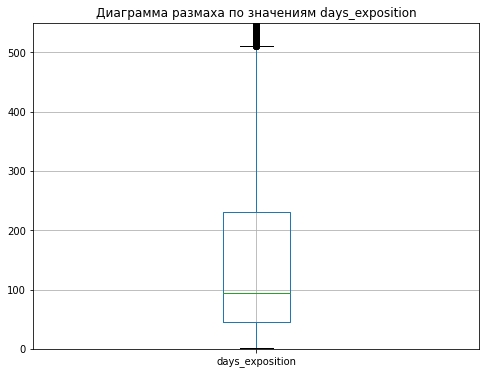

In [136]:
data.plot(
    kind='box',
    y='days_exposition',
    grid=True,
    ylim=(0,550),
    figsize = (8,6),
    title = 'Диаграмма размаха по значениям days_exposition'
)
plt.show()
#построим диаграму размаха

**Вывод:** Как мы видим по данным, у нас есть четкий пик 45 дней, в которые объявление больше всего снимается. Возможно это связано с техническими характеристиками размещения объявления. Например, через 45 дней объявление считается не актуальным. В таком случае пользователь будет повторно заводить это объявление, изменив какой-либо параметр. 
Также имеются четкие пики в 60 дней, 7 дней, 30 дней, 90 дней.  Имеет смысл запросить дополнительные данные по объявлениям, такие как сколько объявлений дал пользователь, были ли изменения/обновления в текущем объявлении. 


Среднее количество дней составляет 180, медианное значение 95 дней. Обычно продажа занимает от 45 до 231 дня.

Для того чтобы определить какие продажи считать быстрыми, а какие долгими рассмотрим диаграмму размаха. Продажи более 510 дней можно отнести к необычно долгим. Все быстрые продажи укладываются в выборку без выбросов, поэтому быстрой можно считать продажу, значение которой минимально и составляет 1 день. 

#### Проверим какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Общая площадь  <a id='total_area_price'></a>

In [137]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,0,False,False,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,0,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,0,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [138]:
total_area_price_pivot = data.pivot_table(index=['total_area'], values='last_price',aggfunc=['median','mean'])
# построим сводную таблицу между общей площадью и полной стоимостью объекта

In [139]:
total_area_price_pivot.columns=['median','mean'] #переименуем столбцы

In [140]:
total_area_price_pivot

,median,mean
total_area,,
12.0,2400000.0,2400000.0
13.0,1850000.0,2350000.0
13.2,1686000.0,1686000.0
14.0,1190000.0,1190000.0
15.0,1725000.0,1725000.0
...,...,...
590.0,65000000.0,65000000.0
618.0,300000000.0,300000000.0
631.0,140000000.0,140000000.0


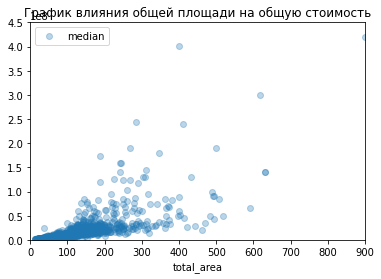

In [141]:
total_area_price_pivot.plot(y='median', style='o', alpha=0.3, ylim=(0,450000000), xlim=(0,900), title = 'График влияния общей площади на общую стоимость')
plt.show() #построим график

In [142]:
data['total_area'].corr(data['last_price']) #посчитаем коэффициент корреляции между общей площадью и полной стоимостью

0.6538710533048461

Вывод:
Общая площадь объекта недвижимости влияет на общую стоимость объекта недвижимости, согласно положительному коэффициенту Пирсона - 0.6538 влияние достаточное.

##### Жилая площадь  <a id='living_area_price'></a>

In [143]:
living_area_price_pivot = data.pivot_table(index=['living_area'], values='last_price',aggfunc=['median','mean'])
# построим сводную таблицу между жилой площадью и полной стоимостью объекта

In [144]:
living_area_price_pivot.columns=['median','mean'] #переименуем столбцы

In [145]:
living_area_price_pivot

,median,mean
living_area,,
2.0,4340000.0,4340000.0
3.0,34715000.0,34715000.0
5.0,2680000.0,2680000.0
5.4,6100000.0,6100000.0
6.0,3799000.0,3799000.0
...,...,...
322.3,140000000.0,140000000.0
332.0,50000000.0,50000000.0
347.5,91500000.0,91500000.0


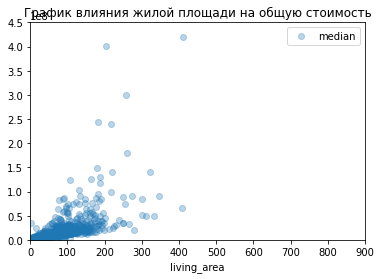

In [146]:
living_area_price_pivot.plot(y='median', style='o', alpha=0.3, ylim=(0,450000000), xlim=(0,900),title = 'График влияния жилой площади на общую стоимость')
plt.show() #построим график

In [147]:
data['living_area'].corr(data['last_price']) #посчитаем коэффициент корреляции между общей площадью и полной стоимостью

0.5665783201294854

Вывод:
Жилая площадь объекта недвижимости влияет на общую стоимость объекта недвижимости, согласно положительному коэффициенту Пирсона (0.5665) влияние не сильное.

##### Площадь кухни  <a id='kitchen_area_price'></a>

In [148]:
kitchen_area_price_pivot = data.pivot_table(index=['kitchen_area'], values='last_price',aggfunc=['median','mean'])
# построим сводную таблицу между площадью кухни и полной стоимостью объекта

In [149]:
kitchen_area_price_pivot.columns=['median','mean'] #переименуем столбцы

In [150]:
kitchen_area_price_pivot

,median,mean
kitchen_area,,
1.30,4250000.0,4.250000e+06
2.00,2720000.0,2.821429e+06
2.30,2940000.0,2.940000e+06
2.40,2200000.0,2.200000e+06
2.89,5967734.0,5.967734e+06
...,...,...
93.20,82400000.0,8.240000e+07
100.00,65000000.0,6.500000e+07
100.70,12500000.0,1.250000e+07


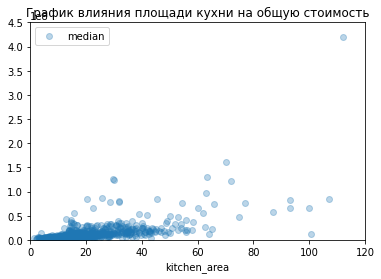

In [151]:
kitchen_area_price_pivot.plot(y='median', style='o', alpha=0.3, ylim=(0,450000000), xlim=(0,120),title = 'График влияния площади кухни на общую стоимость')
plt.show() #построим график

In [152]:
data['kitchen_area'].corr(data['last_price']) #посчитаем коэффициент корреляции между площадью кухни и полной стоимостью

0.5207263715520302

Вывод:
Площадь кухни объекта недвижимости влияет на общую стоимость объекта недвижимости, однако согласно положительному коэффициенту Пирсона (0.5207) влияние не сильное.

##### Количество комнат <a id='rooms_price'></a>

In [153]:
rooms_price_pivot = data.pivot_table(index=['rooms'], values='last_price',aggfunc=['median','mean','count'])
# построим сводную таблицу между количеством комнат и полной стоимостью объекта

In [154]:
rooms_price_pivot.columns=['median','mean','count'] #переименуем столбцы

In [155]:
rooms_price_pivot.sort_values(by='median')

,median,mean,count
rooms,,,
0,2700000.0,3.337724e+06,197
1,3600000.0,3.832296e+06,8034
2,4770338.0,5.591332e+06,7923
3,6200000.0,8.181798e+06,5797
4,9000000.0,1.343185e+07,1175
5,14000000.0,2.376208e+07,326
6,19000000.0,3.170975e+07,105
10,23000000.0,2.616667e+07,3
8,23095000.0,5.022417e+07,12


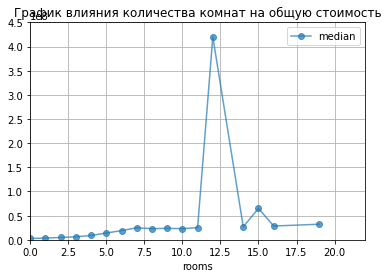

In [156]:
rooms_price_pivot.plot(y='median', style='o-', alpha=0.7, ylim=(0,450000000), xlim=(0,22), grid=True, title = 'График влияния количества комнат на общую стоимость')
plt.show() #построим график

In [157]:
data['rooms'].corr(data['last_price']) #посчитаем коэффициент корреляции между количеством комнат и полной стоимостью

0.36347587531965714

Вывод:
Количество комнат объекта недвижимости влияет на общую стоимость объекта недвижимости, однако согласно положительному коэффициенту Пирсона (0.3634) влияние слабое.

##### Этаж расположения объекта <a id='floor_type_price'></a>

In [158]:
floor_type_price_pivot = data.pivot_table(index=['floor_type'], values='last_price',aggfunc=['median','mean','count'])
# построим сводную таблицу между типом этажа и полной стоимостью объекта

In [159]:
floor_type_price_pivot.columns=['median','mean','count'] #переименуем столбцы

In [160]:
floor_type_price_pivot

,median,mean,count
floor_type,,,
другой,4848500.0,6.674486e+06,17324
первый,3900000.0,4.800465e+06,2912
последний,4350000.0,7.349134e+06,3411


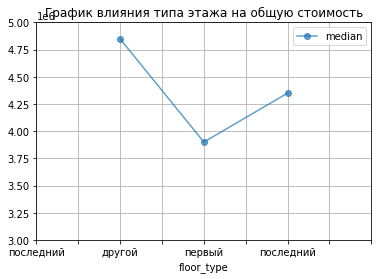

In [161]:
floor_type_price_pivot.plot(y='median', style='o-', alpha=0.7, ylim=(3000000,5000000), xlim=(-1,3), grid=True, title = 'График влияния типа этажа на общую стоимость')
plt.show() #построим график

Вывод:
Тип этажности объекта недвижимости влияет на общую стоимость объекта недвижимости, объекты с типом "другой" дороже чем квартиры с типом "последний". Самые дешевые квартиры с типом "первый". 

##### Даты размещения (день недели,месяц, год)  <a id='weekday_month_year'></a>

###### День недели

In [162]:
weekday_exposition_price_pivot = data.pivot_table(index=['weekday_exposition'], values='last_price',aggfunc=['median','mean','count'])
# построим сводную таблицу между днем недели размещения и полной стоимостью объекта

In [163]:
weekday_exposition_price_pivot.columns=['median','mean','count'] #переименуем столбцы

In [164]:
weekday_exposition_price_pivot.sort_values(by='median')

,median,mean,count
weekday_exposition,,,
6,4550000.0,6.248916e+06,1691
5,4575000.0,6.982510e+06,1933
4,4577500.0,6.364605e+06,3992
0,4650000.0,6.510815e+06,3606
3,4650000.0,6.711767e+06,4286
2,4700000.0,6.625972e+06,3964
1,4720000.0,6.393782e+06,4175


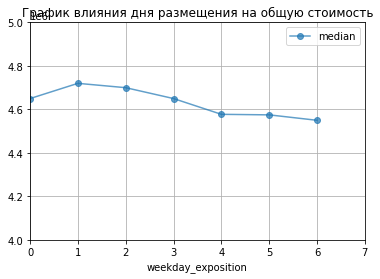

In [165]:
weekday_exposition_price_pivot.plot(y='median', style='o-', alpha=0.7, ylim=(4000000,5000000), xlim=(0,7), grid=True, title = 'График влияния дня размещения на общую стоимость')
plt.show() #построим график

Вывод:
День недели размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости. Объекты размещенные во вторник самые дорогие, объекты размещеные в воскресенье самые дешевые.

###### Месяц

In [166]:
month_exposition_price_pivot = data.pivot_table(index=['month_exposition'], values='last_price',aggfunc=['median','mean','count'])
# построим сводную таблицу между месяцем размещения и полной стоимостью объекта

In [167]:
month_exposition_price_pivot.columns=['median','mean','count'] #переименуем столбцы

In [168]:
month_exposition_price_pivot.sort_values(by='median')

,median,mean,count
month_exposition,,,
6,4400000.0,6.311184e+06,1755
5,4500000.0,6.594777e+06,1270
10,4560000.0,6.235166e+06,2124
8,4570000.0,6.352839e+06,1742
1,4600000.0,6.666975e+06,1491
2,4650000.0,6.464463e+06,2639
3,4650000.0,6.365380e+06,2581
7,4650000.0,6.636387e+06,1689
12,4695000.0,7.005343e+06,1638


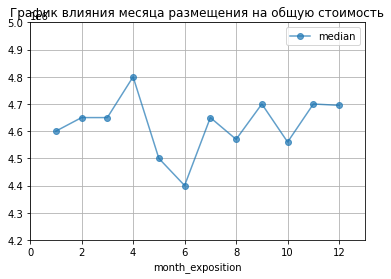

In [169]:
month_exposition_price_pivot.plot(y='median', style='o-', alpha=0.7, ylim=(4200000,5000000), xlim=(0,13), grid=True, title = 'График влияния месяца размещения на общую стоимость')
plt.show() #построим график

Вывод:
Месяц размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости. Объекты размещенные в апреле самые дорогие, объекты размещеные в июне самые дешевые. Объекты недвижимости размещеные в сентябре, ноябре, декабре стоят примерно одинаково.

###### Год

In [170]:
year_exposition_price_pivot = data.pivot_table(index=['year_exposition'], values='last_price',aggfunc=['median','mean','count'])
# построим сводную таблицу между годом размещения и полной стоимостью объекта

In [171]:
year_exposition_price_pivot.columns=['median','mean','count'] #переименуем столбцы

In [172]:
year_exposition_price_pivot.sort_values(by='median')

,median,mean,count
year_exposition,,,
2017,4500000.0,6.585822e+06,8185
2016,4550000.0,6.829415e+06,2765
2018,4550000.0,5.951030e+06,8510
2019,5050000.0,6.784741e+06,2878
2015,5350000.0,8.592727e+06,1173
2014,7640000.0,1.204660e+07,136


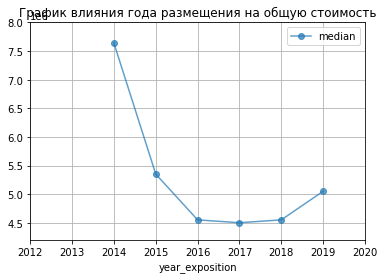

In [173]:
year_exposition_price_pivot.plot(y='median', style='o-', alpha=0.7, ylim=(4200000,8000000), xlim=(2012,2020), grid=True, title = 'График влияния года размещения на общую стоимость')
plt.show() #построим график

Вывод:
Год размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости, однако в данном подразделе стоит учитывать экономическую ситуацию в стране. Действительно после кризиса в 2014 году были программы по снижению стоимости жилья, связанные с потерей спроса на жилье, сокращением строительства. В связи с этим рассматривать влияние года размещения объявления на полную стоимость жилья считаю нецелесообразным.

#### Средняя цена одного м2 в 10 населенных пунктах <a id='max_min'></a>

In [174]:
data_pivot_locality = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=('mean','count'))
#построим сводную таблицу на основе данных средняя цена одного квадратного метра и названия населенного пункта

In [175]:
data_pivot_locality.columns = ['count', 'mean']

In [176]:
data_pivot_locality = data_pivot_locality.sort_values(by='count', ascending=False).head(10) 
# отсортируем полученные данные в порядке убывания количества объявлений

In [177]:
data_pivot_locality

,count,mean
locality_name,,
санкт-петербург,15718,114819.915148
мурино,590,86087.512017
кудрово,472,95324.930508
шушары,440,78677.364318
всеволожск,398,68654.473970
пушкин,369,103125.819377
колпино,338,75424.579112
парголово,327,90175.913089
гатчина,307,68746.146515


In [178]:
data_pivot_locality[data_pivot_locality['mean'] == data_pivot_locality['mean'].min()]
# самая низкая средняя стоимость за м2 

,count,mean
locality_name,,
выборг,237,58141.909325


In [179]:
data_pivot_locality[data_pivot_locality['mean'] == data_pivot_locality['mean'].max()]
# самая высокая средняя стоимость за м2 

,count,mean
locality_name,,
санкт-петербург,15718,114819.915148


Вывод: Самая большая средняя цена за квадратный метр в населенном пунке с наибольшим числом объявлений в Санкт-Петербурге. И составляет она 114819.915148.
Самая низкая средняя цена за квадратный метр в Выборге и составляет 58141.909325.


#### Средняя цена каждого километра<a id='mean_price'></a>

In [180]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,0,False,False,11.0,2.0,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,0,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,0,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [181]:
data_pivot_city = data.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean')
#построим сводную таблицу по средней стоимости квартир за каждый км от санкт-петербурга

In [182]:
data_pivot_city

,price_per_meter
city_centers_nearest_km,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121387.453743
4.0,133282.874738
5.0,140509.789022
6.0,151012.193673
7.0,156176.879524
8.0,124875.589581


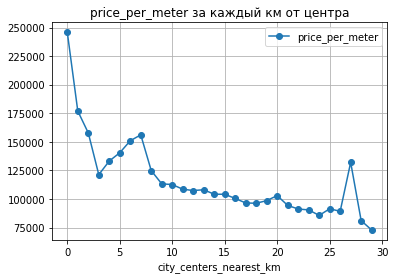

In [183]:
data_pivot_city.plot(style='o-', grid=True, title='price_per_meter за каждый км от центра')
plt.show() # построим график

Вывод: Чем ближе к центру города, тем недвижимость дороже. Есть небольшие пики цены при удаленности в 7 км и 27 км, но это частные случаи.
Судя по графику недвижимостью в центре города можно считать объекты удаленностью до 6 км.

### Общий вывод

На основании проведенного исследования сделаны следующие выводы:
- Самое большое распространение имеют объекты недвижимости с [общей площадью](#total_area) примерно от 40м2 до 70 м2.
- Самое большое распространение имеют объекты недвижимости с [жилой площадью](#living_area) примерно от 18м2 до 42 м2. Объектов недвижимости с площадью более 75м2 уже намного меньше.
- Самое большое распространение имеют объекты недвижимости с [площадью кухни](#kitchen_area) примерно от 7 м2 до 12 м2. Объектов недвижимости с площадью кухни более 20 м2 уже намного меньше.
- Самое большое распространение имеют объекты недвижимости с [ценой продажи](#last_price) примерно от 3,4 млн  до 7 млн. Объектов недвижимости с ценой более 25 млн уже намного меньше.
- Самое большое распространение имеют объекты недвижимости с 1-ой,2-мя и 3-мя [комнатами](#rooms). Объектов недвижимости с количеством комнат от 6-ти уже значительно меньше.
- Самое большое распространение имеют объекты недвижимости с [высотой потолков](#ceiling_height) примерно 2.5 м - 2.8 м. Объектов недвижимости с высотой полотков от 3.5 уже значительно меньше.
- Самое большое распространение имеют объекты недвижимости на 2,3,1,4,5,6,7 [этаже](#floor). Объектов недвижимости на этаже от 10 уже значительно меньше.
- Самое большое распространение имеют объекты недвижимости с [типом этажа](#floor_type) "другой". Объектов недвижимости на "последнем" этаже и на "первом" примерно одинаково.
- Самое большое распространение имеют [объекты недвижимости высотой](#floors_total) 5 и 9 этажей. Меньше - 16 этажей и 12 этажей, их примерно одинаковое количество. Объекты недвижимости выше 26 этажей уже редки. А также редкие оказались объекты недвижимости с 1 этажом.
- Самое большое распространение имеют объекты недвижимости [удаленностью от центра](#city_centers_nearest) примерно от 11000 до 18000 м. Меньше объектов недвижимости расположенных до 10000 м до центра города. Объектов недвижимости с удаленностью выше 20000 уже совсем немного.
- Самое большое распространение имеют объекты недвижимости [удаленностью от аэропорта](#airports_nearest) примерно от 12000 м до 27000 м. Объектов недвижимости с удаленностью меньше 10000 м и больше 55000 м единицы.
- В целом объекты недвижимости расположены недалеко от парков. Больше всего объектов недвижимости с [удаленностью от парков](#parks_nearest) примерно 250 м до 600 м. Объекты удаленностью более 1000 м уже редки.
-[День и месяц публикации](#weekday_exposition) : больше всего публикуют объеявления в 3 (четверг) и 1 (вторник), а меньше всего в 5 (суббота) и 6 (воскресенье),т.е.в выходные дни; наибольшее количество публикаций объявлений было во 2(февраль) и 3(март), а меньше всего объявлений в 5(май) и 1 (январь), в летние месяцы 6(июнь),7(июль),8(август) количество публикуемых объявлений примерно одинаково.
Таким образом можно сделать вывод, что пользователи меньше всего публикуют объявления в выходные дни и в месяца, когда больше всего выходных.
- Среднее количество [дней продажи](#sale) составляет 180, медианное значение 95 дней. Обычно продажа занимает от 45 до 231 дня. Продажи более 510 дней можно отнести к необычно долгим. Быстрой можно считать продажу, значение которой минимально и составляет 1 день.
- На общую стоимость объекта недвижимости влияют следующие показатели:
  - [Общая площадь объекта недвижимости](#total_area_price) влияет на общую стоимость объекта недвижимости, согласно положительному коэффициенту Пирсона - 0.6538 влияние достаточное.
  - [Жилая площадь объекта недвижимости](#living_area_price) влияет на общую стоимость объекта недвижимости, согласно положительному коэффициенту Пирсона (0.5665) влияние не сильное.
  - [Площадь кухни объекта недвижимости](#kitchen_area_price) влияет на общую стоимость объекта недвижимости, однако согласно положительному коэффициенту Пирсона (0.5207) влияние не сильное.
  -[Количество комнат объекта недвижимости](#rooms_price) влияет на общую стоимость объекта недвижимости, однако согласно положительному коэффициенту Пирсона (0.3634) влияние слабое.
  -[Тип этажности объекта недвижимости](#floor_type_price) влияет на общую стоимость объекта недвижимости, объекты с типом "другой" дороже чем квартиры с типом "последний". Самые дешевые квартиры с типом "первый". 
  - [Влияние дня, месяца и года размещения объявления](#weekday_month_year). День недели размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости. Месяц размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости. Год размещения объекта недвижимости практически не влияет на общую стоимость объекта недвижимости, однако в данном подразделе стоит учитывать экономическую ситуацию в стране. Рассматривать влияние года размещения объявления на полную стоимость жилья считаю нецелесообразным.

- Самая большая [средняя цена за квадратный метр в населенном пунке с наибольшим числом объявлений](#max_min) в Санкт-Петербурге. И составляет она 114819.915148.
Самая низкая средняя цена за квадратный метр в Выборге и составляет 58141.909325.
- Чем [ближе к центру города, тем недвижимость дороже](#mean_price). Недвижимостью в центре города можно считать объекты удаленностью до 6 км.
